## Object Detection - YOLOv3

In [ ]:
pip install ipyfilechooser

In [1]:
import numpy as np
import cv2 as cv
from motrackers.detectors import YOLOv3

C:\Users\admin\.conda\envs\sussy\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\admin\.conda\envs\sussy\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\admin\.conda\envs\sussy\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
VIDEO_FILE = "test.mp4"
WEIGHTS_PATH = './examples/pretrained_models/yolo_weights/yolov4.weights'
CONFIG_FILE_PATH = './examples/pretrained_models/yolo_weights/yolov4.cfg'
LABELS_PATH = "./examples/pretrained_models/yolo_weights/coco_names.json"

USE_GPU = True
CONFIDENCE_THRESHOLD = 0.5
NMS_THRESHOLD = 0.2
DRAW_BOUNDING_BOXES = True

In [3]:
model = YOLOv3(
    weights_path=WEIGHTS_PATH,
    configfile_path=CONFIG_FILE_PATH,
    labels_path=LABELS_PATH,
    confidence_threshold=CONFIDENCE_THRESHOLD,
    nms_threshold=NMS_THRESHOLD,
    draw_bboxes=DRAW_BOUNDING_BOXES,
    use_gpu=USE_GPU
)

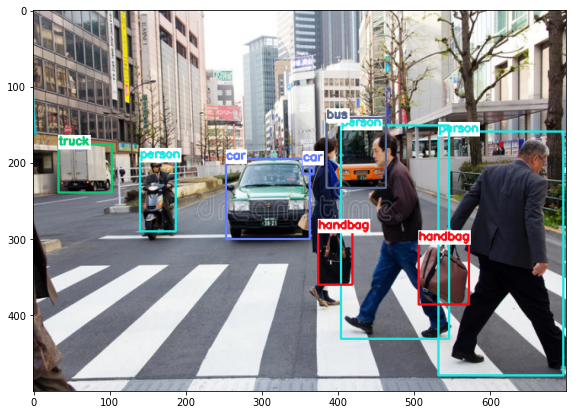

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = cv.imread("street2.jpg")
#ok, image = cap.read()

# if not ok:
#     print("Cannot read the video feed.")
#     break
image = cv.resize(image, (700, 500))
booli, op = model.detect(image)
bboxes, confidences, class_ids = op
frame = model.draw_bboxes2(image.copy(), bboxes, confidences, class_ids)
frame = cv.cvtColor(frame, cv.COLOR_RGB2BGR)
fig = plt.figure(figsize=(12,7))
plt.imshow(frame)


In [9]:
fig.savefig('obj.jpg', bbox_inches='tight', dpi=150)